In [51]:
import csv
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
from scipy.optimize import curve_fit

def read_csv_file(file_path):
    with open(file_path, 'r') as file:
        reader = csv.reader(file)
        data = list(reader)
        del data[0:7]
        return np.array(data, dtype=np.float64)

In [42]:
#  MeV and mm
data_1 = read_csv_file('D:\VM_connection\workspace\calorimeter\B4a\data\B4_1.csv')
data_2 = read_csv_file('D:\VM_connection\workspace\calorimeter\B4a\data\B4_2.csv')
data_3 = read_csv_file('D:\VM_connection\workspace\calorimeter\B4a\data\B4_3.csv')
data_4 = read_csv_file('D:\VM_connection\workspace\calorimeter\B4a\data\B4_4.csv')

In [110]:
indices_1 = np.where((data_1 == [100, 1000, 1000]).all(axis=1))[0]
indices_2 = np.where((data_2 == [100, 1000, 1000]).all(axis=1))[0]
indices_3 = np.where((data_3 == [100, 1000, 1000]).all(axis=1))[0]
indices_4 = np.where((data_4 == [100, 1000, 1000]).all(axis=1))[0]
result_1 = np.split(data_1, indices_1)[:len(indices_1)]
result_2 = np.split(data_2, indices_2)[:len(indices_2)]
result_3 = np.split(data_3, indices_3)[:len(indices_3)]
result_4 = np.split(data_4, indices_4)[:len(indices_4)]
for i in range(1,len(result_1)):
    result_1[i] = result_1[i][1:]
for i in range(1,len(result_2)):
    result_2[i] = result_2[i][1:]
for i in range(1,len(result_3)):
    result_3[i] = result_3[i][1:]
for i in range(1,len(result_4)):
    result_4[i] = result_4[i][1:]
result = result_1 + result_2 + result_3 + result_4

In [111]:
print(result[1])
print(result[2])

[[ 2.45269e-22  0.00000e+00  0.00000e+00]
 [ 3.38746e-01  0.00000e+00  0.00000e+00]
 [ 0.00000e+00  0.00000e+00  0.00000e+00]
 ...
 [ 6.96890e-02 -1.82801e-01  0.00000e+00]
 [ 1.89621e-01 -2.91452e-01  4.16353e-01]
 [ 1.07348e-02 -1.54819e-01 -1.07229e-01]]
[[ 2.45269e-22  0.00000e+00  0.00000e+00]
 [ 7.12158e-01  0.00000e+00  0.00000e+00]
 [ 0.00000e+00  0.00000e+00  0.00000e+00]
 ...
 [ 1.78266e+00 -9.76212e-01  5.38422e-01]
 [ 6.96890e-02 -9.76212e-01  5.38422e-01]
 [ 7.35068e-02 -1.19193e+00  5.86439e-01]]


In [124]:
radii = []

for particle in result:
    # 计算总能量
    total_energy = np.sum(particle[:, 0])

    # 计算每个点到原点的距离
    distances = np.sqrt(np.sum(particle[:, 1:]**2, axis=1))
    # print(np.max(distances))

    # 按距离从小到大排序
    indices = distances.argsort()
    distances = distances[indices]
    particle = particle[indices]
    particle = particle[distances < 35]
    # print(np.max(distances[distances < 35]))

    # 累积能量
    cumulative_energy = np.cumsum(particle[:, 0])

    # 找到达到90%能量的点
    index = np.where(cumulative_energy >= total_energy * 0.9)[0][0]
    radius = distances[index]
    radii.append(radius)

print(radii)

[16.093254680219285, 19.04946843700632, 19.983868515630302, 17.91073901554316, 15.750488013023595, 18.5523510838411, 16.615199948492947, 18.08117387548787, 17.794036875619316, 18.909019461093163, 16.68965223461831, 16.629463494953768, 19.97302405195568, 19.462913021950236, 18.52586546048524, 18.410132197355345, 17.26154665173431, 17.30243732675833, 18.391897282499162, 18.520380737177085, 16.701176776670557, 18.781624183323444, 17.014376364889195, 17.7678076421966, 17.524395757058215, 18.648061868671675, 17.40244689944779, 18.18739025066543, 17.89917018244142, 19.483402119499047, 17.398132889180953, 15.34515337778023, 16.74727313505097, 19.848402039872127, 17.20439378285675, 18.342930495177153, 18.329409896938856, 16.117325455077836, 18.91267200714907, 18.51627892909372, 17.40008235393155, 19.228664423829752, 18.003860227784486, 19.085909690921206, 17.28437989776029, 17.08344280531591, 17.286981274022367, 18.057100201859654, 20.95565121611829, 17.684674263104196, 17.85034214082184, 18.1

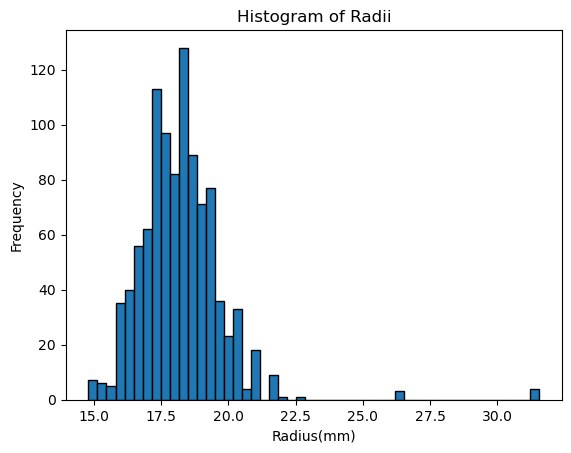

In [125]:
plt.hist(radii, bins=50, edgecolor='black')
plt.title('Histogram of Radii')
plt.xlabel('Radius(mm)')
plt.ylabel('Frequency')

plt.show()

Mean (mu): 18.204979343305737
Standard Deviation (std): 1.5793284094806788


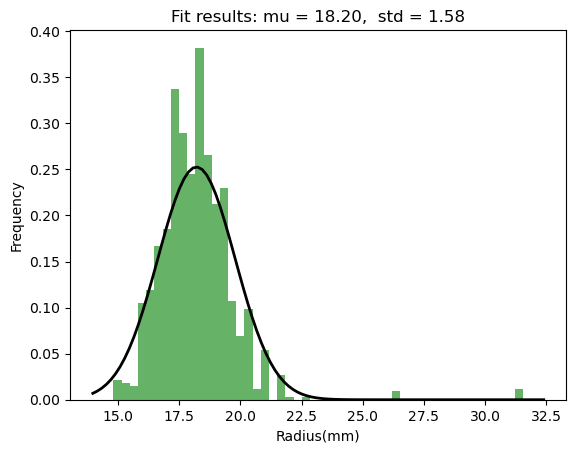

In [126]:
sorted_radii = np.array(sorted(radii))
# sorted_radii = sorted_radii[sorted_radii < 30]
# sorted_radii = sorted_radii[sorted_radii > 15]
mu, std = norm.fit(sorted_radii)

print(f"Mean (mu): {mu}")
print(f"Standard Deviation (std): {std}")

# 绘制原始数据的直方图
plt.hist(sorted_radii, bins=50, density=True, alpha=0.6, color='g')

# 绘制拟合的高斯分布
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)
plt.plot(x, p, 'k', linewidth=2)

title = "Fit results: mu = %.2f,  std = %.2f" % (mu, std)
plt.title(title)
plt.xlabel('Radius(mm)')
plt.ylabel('Frequency')

plt.show()

Scale factor (a): 331.33583145761804
Mean (mu): 18.050729258109314
Standard Deviation (std): 1.2419234183769206


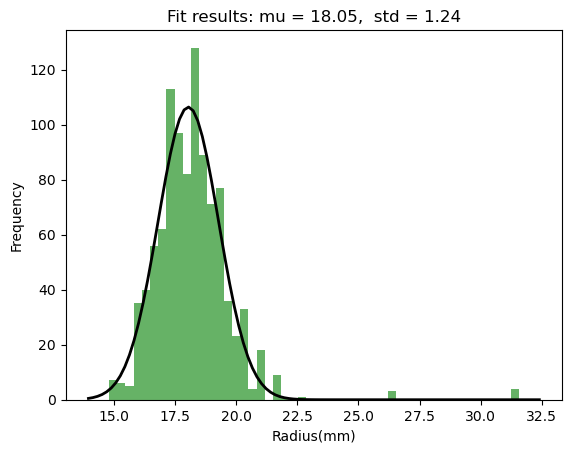

In [127]:
def gauss(x, a, mu, sigma):
    return a * norm.pdf(x, mu, sigma)

# 计算直方图
hist, bin_edges = np.histogram(sorted_radii, bins=50)
bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2

# 拟合高斯分布和比例系数
popt, pcov = curve_fit(gauss, bin_centers, hist, p0=[1, mu, std])

print(f"Scale factor (a): {popt[0]}")
print(f"Mean (mu): {popt[1]}")
print(f"Standard Deviation (std): {popt[2]}")

# 绘制原始数据的直方图
plt.hist(sorted_radii, bins=50, alpha=0.6, color='g')

# 绘制拟合的高斯分布
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = popt[0] * norm.pdf(x, popt[1], popt[2])
plt.plot(x, p, 'k', linewidth=2)

title = "Fit results: mu = %.2f,  std = %.2f" % (popt[1], popt[2])
plt.title(title)
plt.xlabel('Radius(mm)')
plt.ylabel('Frequency')

plt.show()